https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
ds = load_iris()

features = ds.data
target = ds.target

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=50)

In [3]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('Accuracy: {}'.format(accuracy_score(y_test, pred)))
print('F1: {}'.format(f1_score(y_test, pred, average='micro')))

Accuracy: 0.9473684210526315
F1: 0.9473684210526315


In [4]:
pd.crosstab(y_test, pred, rownames=['True'], colnames=['Pred'])

Pred,0,1,2
True,,,
0,11,0,0
1,0,13,2
2,0,0,12


In [5]:
def find_k(X_train, y_train):
    
    global nb 
    nb = list(range(1, 50, 2))
    cv_score = []
    
    for k in nb:
        knn = KNeighborsClassifier(n_neighbors=k)
        score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        cv_score.append(score.mean())
        
    return cv_score

In [6]:
best_k = find_k(X_train, y_train)

In [18]:
test = pd.DataFrame(list(zip(nb, best_k)), columns=['k', 'accuracy'])

test['mis_error'] = test.apply(lambda row: 1-row.accuracy, axis=1)

In [19]:
test.head(2)

,k,accuracy,mis_error
0,1,0.961465,0.038535
1,3,0.971465,0.028535


In [21]:
test.loc[test['accuracy'].idxmax()]

k            3.000000
accuracy     0.971465
mis_error    0.028535
Name: 1, dtype: float64

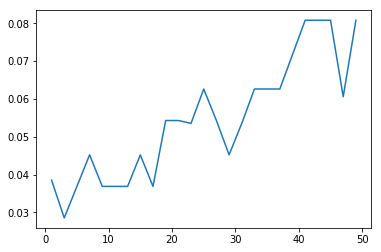

In [20]:
plt.plot(nb, 'mis_error', data=test)

## READ

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter